### (finito, rivedi punto 4) Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.
 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

In [3]:
N = int(1e5)
x = np.random.uniform(0.1, 10, N)

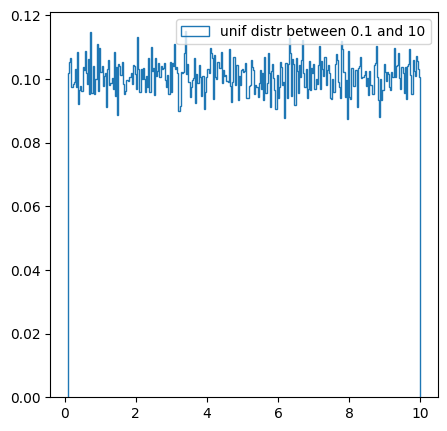

In [4]:
fig,ax = plt.subplots(figsize=(5, 5))

plt.hist(x, int(N**0.5), density=True, histtype='step', label='unif distr between 0.1 and 10')
ax.legend(loc='upper right')
fig.show()

In [5]:
y=np.log10(x)

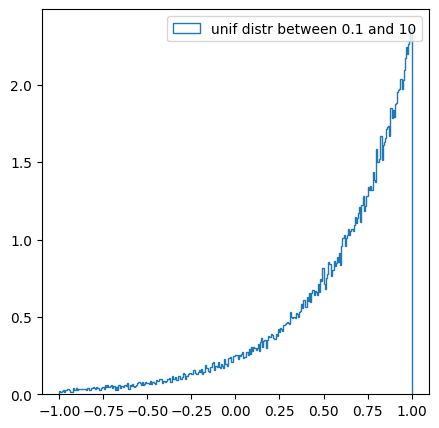

In [6]:
fig,ax = plt.subplots(figsize=(5, 5))

plt.hist(y, int(N**0.5), density=True, histtype='step', label='unif distr between 0.1 and 10')
ax.legend(loc='upper right')
fig.show()

Compute the pdf of y

I have x with $p(x) = \frac{1}{10-0.1}$

I want $ p(y) = |\frac{dx}{dy}| p(x) $

$y=\log_{10} x$  $\longrightarrow$  $x=10^y$

$\frac{dx}{dy} = 10^y \ln(10)$

$\longrightarrow$ $p(y) =10^y \log(10) /(10-0.1)$

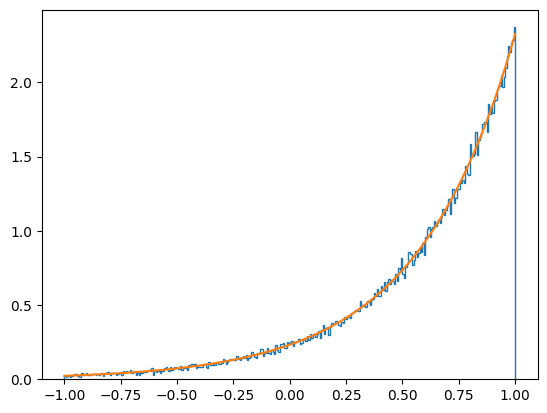

In [8]:
#RIVEDI UN ATTIMO QUESTO PUNTO QUI

def p(y): 
    return 10**y * np.log(10)/(10-0.1)

y2 = np.linspace(-1,1, len(y))
py = p(y2)

plt.hist(y, int(N**0.5), density=True,histtype='step', label='unif distr between 0.1 and 10')
plt.plot(y2, py)
ax.legend(loc='upper right')
fig.show()

In [9]:
#5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 


mean_x=np.log10(np.mean(x))
median_x=np.log10(np.median(x))

mean_y=np.mean(y)
median_y=np.median(y)

print('means:', mean_x, mean_y, 'medians:', median_x, median_y)


means: 0.7031462445171549 0.5855781484374657 medians: 0.7023084262749747 0.7023084258735399
